In [5]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import scipy.optimize
from scipy.stats import chi2, kstwobign, norm
from mpmath import mp
from scipy.stats import f
from scipy.stats import ncf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# $$\xi \text{\textasciitilde} N(a, \sigma_x^2),\ \ \ \ \eta \text{\textasciitilde} N(b, \sigma_y^2)$$
# $$\sigma_x^2 = 2,\ \ \ \ \sigma_y^2 = 1$$
# $$x = \{-1.11,\ -6.10,\ 2.42\},\ \ \ \ \{-2.29,\ -2.91\}$$
# $$H_0: a = b,\ \ \ \ H_1: a > b$$
# $$\alpha = 0.05$$

In [18]:
alpha = 0.05
n = 3
m = 2
x = np.array([-1.11, -6.10, 2.42])
y = np.array([-2.29, -2.91])
sigma_x_sqrd = 2
sigma_y_sqrd = 1

## $$Если\ H_0\ верна,\ то\ Z = \frac{\overline{x} - \overline{y}}{\sqrt{\frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m}}} \leadsto N(0, 1)$$

## $$p\_value = \displaystyle\int_{\widetilde{Z}}^{+\infty} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}dx$$

In [15]:
Z = (x.mean() - y.mean())/math.sqrt(sigma_x_sqrd/n + sigma_y_sqrd/m)
print(f"\u0342Z = {Z:.4f}")

͂Z = 0.9289


In [16]:
p_value = norm.sf(Z, 0, 1)
print(f"p_value = {p_value:.4f}")

p_value = 0.1765


## Для правостороннего теста:
## $p\_value > \alpha \Rightarrow Нет\ оснований\ отвергнуть\ H_0$

# W
# $$W = 1 - \Phi\Bigg(u_{1 - \alpha} - \frac{\Delta}{\sqrt{\frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m}}}\Bigg)$$
# $$u_{1 - \alpha}, \Phi\ для\ N(0, 1),\ \Delta = a - b$$

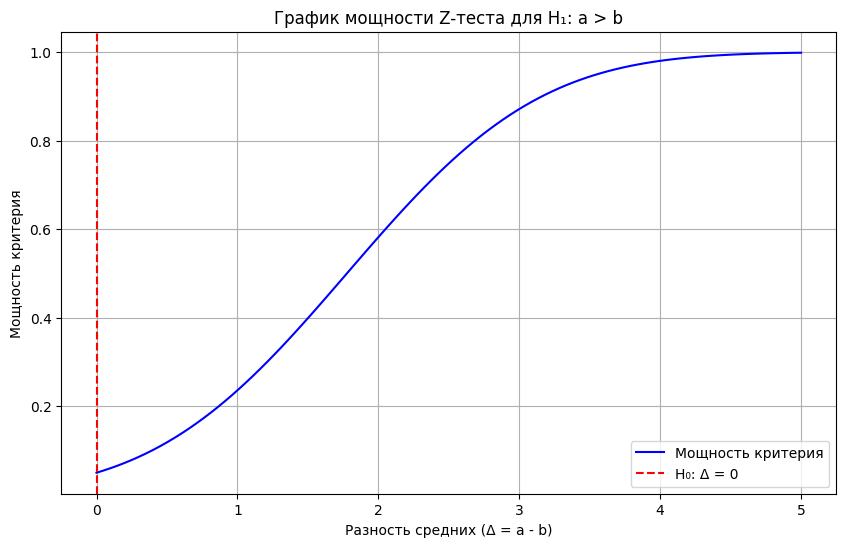

In [ ]:
delta_vals = np.linspace(0, 5, 100)  # диапазон разности средних (Δ = a - b)

power = 1 - norm.cdf(norm.ppf(1 - alpha) - delta_vals / math.sqrt(sigma_x_sqrd/n + sigma_y_sqrd/m))

plt.figure(figsize=(10, 6))
plt.plot(delta_vals, power, color='blue', label='Мощность критерия')
plt.axvline(x=0, color='red', linestyle='--', label='H₀: Δ = 0')
plt.xlabel('Разность средних (Δ = a - b)')
plt.ylabel('Мощность критерия')
plt.title('График мощности Z-теста для H₁: a > b')
plt.legend()
plt.grid()
plt.show()